<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~3_pg_50_~_86_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1117(금) 과제_파이썬 딥러닝 텐서플로 ch3.1~3 pg. 50 ~ 86 필사
### 2129014 박지현

# PART 03. 케라스(Keras)

## PART 03.01. 딥러닝 준비

케라스 API를 텐서플로가 내제화함 > 사용이 편리한 케라스 라이브러리와 통합되어 이용할 수 있는 텐서플로를 사용할 것임

### 1-1. 주요 용어

#### 1-1-1. 하이퍼파라미터(hyper-parameter)
: 머신러닝, 딥러닝 모델을 훈련할 떄 사용자가 직접 설명해주는 설정 값
- 사용자가 어떠한 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라짐 (기본값 존재)


#### 1-1-2. 과소적합 vs. 과대적합 (underfitting vs. overfitting)
- 모델이 충분히 학습되지 않거나(과소적합), 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합되면(과대적합) 예측 데이터에 대한 예측 오차가 커지게 됨
- 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델 결정


#### 1-1-3. 에포크(epoch)
: 딥러닝 모델이 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프 = 1 epoch


#### 손실함수(loss function)
: 예측 값과 정답 값의 차이 또는 오차
- 딥러닝 모델에서 적용하는 손실함수 : 사용자가 정의 필요

- 다음 예제와 같이, 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

#### 1-1-5. 경사하강법(gradient descent)

1. 경사하강법 적용을 위한 데이터셋 생성

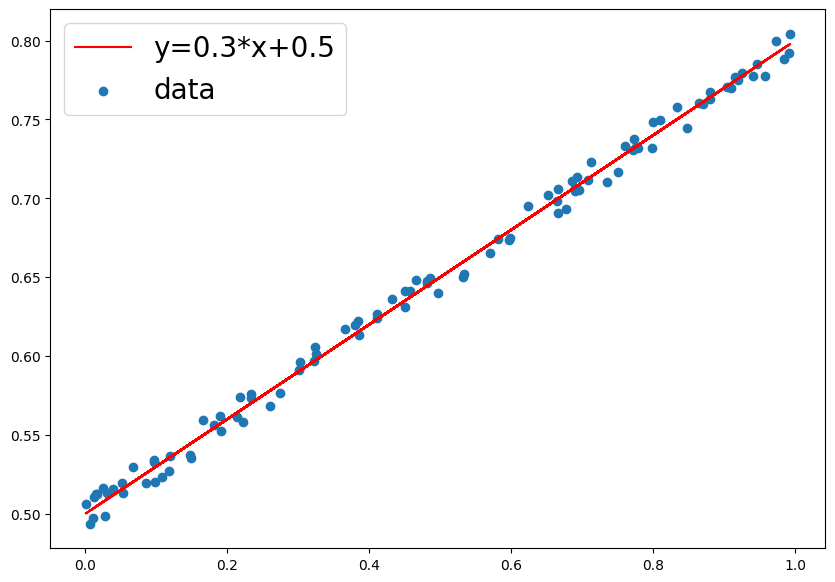

w: 0.3, b: 0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w*x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

2. 그래디언트 w, b를 넘파이로 최적화하는 과정 구현하기

In [3]:
# 최대 반복 횟수
num_epoch = 1000

# 합습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w*x + b

    # Loss Function 정의
    error = 0.5*((y_hat - y)**2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate*((y_hat-y)*x).sum()
    b = b - learning_rate*((y_hat-y)).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

    print("----" * 15)
    print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.25501, b = 0.58208 error = 1.22651
------------------------------------------------------------
 0 w = 0.3, b = 0.6 error = 1.22651
------------------------------------------------------------
 1 w = 0.2, b = 0.6 error = 0.19156
------------------------------------------------------------
 2 w = 0.2, b = 0.5 error = 0.04612
------------------------------------------------------------
 3 w = 0.2, b = 0.5 error = 0.02453
------------------------------------------------------------
 4 w = 0.2, b = 0.5 error = 0.02026
 5 w = 0.24341, b = 0.53032 error = 0.01850
------------------------------------------------------------
 5 w = 0.2, b = 0.5 error = 0.01850
------------------------------------------------------------
 6 w = 0.2, b = 0.5 error = 0.01718
------------------------------------------------------------
 7 w = 0.2, b = 0.5 error = 0.01600
------------------------------------------------------------
 8 w = 0.2, b = 0.5 error = 0.01491
---------------------------------------

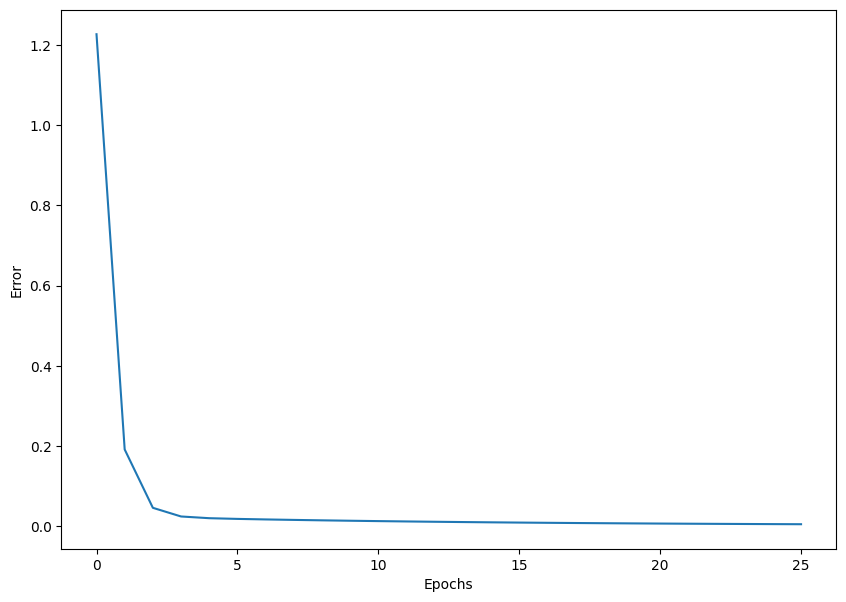

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2. 딥러닝 프로세스
딥러닝 모델 구축 및 훈련을 위한 프로세스


#### 1-2-1. 데이터 전처리
: 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계


####. 1-2-2. 모델 생성
: 모델의 구조를 정의하고 생성하는 단계


#### 1-2-3. 모델 컴파일
: 모델 인스턴스에 compile() 메소드를 적용하고, 생성된 모델에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표 등을 정의하는 단계


#### 1-2-4. 모델 훈련
: 모델을 훈련하는 단계


#### 1-2-5. 모델 검증
: 훈련이 완료된 모델을 검증하는 단계


#### 1-2-6. 모델 예측
: 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환하는 단

## PART 03.02. 단순 신경망 훈련

### 2-1. 선형회귀
- 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

### 2-2. 뉴런(Neuron)
: 인공 신경망 모델을 구성하는 하나의 신경
- = 노드(node)
- 신경망은 여러 개의 레이어(layer)를 가짐, 1개의 레이어는 1개 이상의 뉴런으로 구성
- 뉴런 내부에 가중치 존재 > 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴련의 가중치 업데이트됨

### 2-3.Dense 레이어
: 심층 신경망 모델을 구성하는 가장 기본 레이

In [5]:
import tensorflow as tf
# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4. 데이터셋 만들기

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


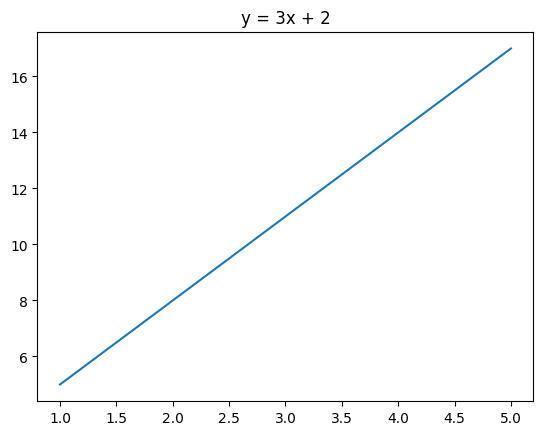

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### 2-5. Sequential API

#### 2-5-1. 모델 구조

In [8]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2. 입력 데이터 형태

In [10]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지태
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

#### 2-5-3. 단순선형회귀 모델 정의

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6. 모델 요약

In [12]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.7. 컴파일

In [15]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_sqared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [16]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [17]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [18]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8. 훈련

In [19]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 481ms/step - loss: 42.0603 - mae: 6.1790
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 24.6786 - mae: 4.7760
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.5482 - mae: 3.7048
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6437 - mae: 2.8869
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 5.2016 - mae: 2.2623


In [20]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 328ms/step - loss: 302.0089 - mae: 16.0641
Epoch 2/1200
1/1 [==============================] - 0s 13ms/step - loss: 176.0275 - mae: 12.2887
Epoch 3/1200
1/1 [==============================] - 0s 16ms/step - loss: 102.6116 - mae: 9.4065
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 59.8282 - mae: 7.2063
Epoch 5/1200
1/1 [==============================] - 0s 11ms/step - loss: 34.8960 - mae: 5.5266
Epoch 6/1200
1/1 [==============================] - 0s 9ms/step - loss: 20.3665 - mae: 4.2442
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 11.8993 - mae: 3.2652
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 6.9648 - mae: 2.5178
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 4.0890 - mae: 1.9471
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.4129 - mae: 1.5114
Epoch 11/1200
1/1 [=============================

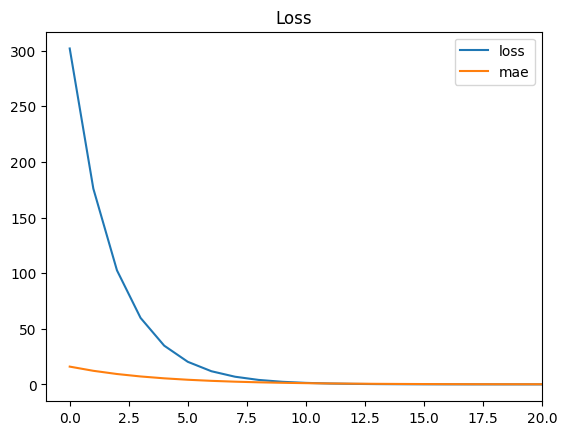

In [21]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9. 검증

In [22]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 276ms/step - loss: 2.2805e-05 - mae: 0.0041


[2.2804644686402753e-05, 0.0040988922119140625]

### 2-10. 예측

In [23]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 187ms/step


array([[32.019814]], dtype=float32)

## PART 03.03. 심층 신경망으로 이미지 분류

### 3-1. 케라스 내장 데이터셋 로

In [24]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [25]:
# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


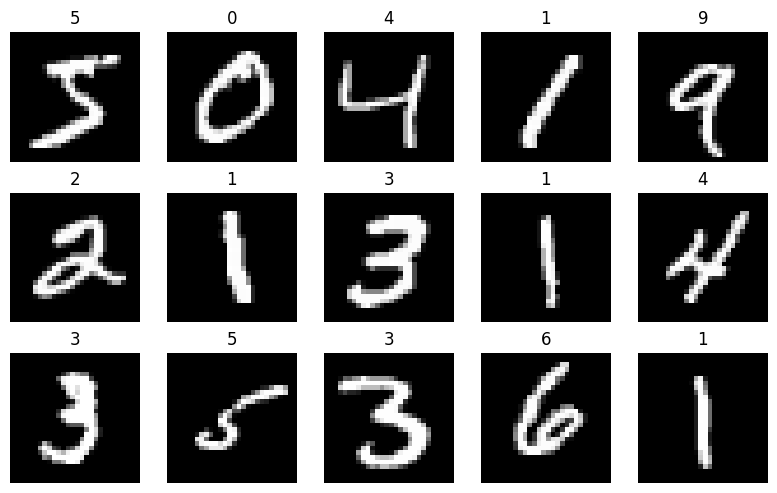

In [27]:
### 데이터 시각화

import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리

In [28]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [29]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [30]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [31]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3. Flatten 레이어

In [32]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [33]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4. 활성화 함수(Activation Function)

In [34]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [35]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [37]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6. 손실함수

In [38]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss = 'binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7. 옵티마이저

In [39]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8. 평가지표

In [40]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [41]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9. 훈

In [42]:
# 훈련
model.fit(x_train, y_train,
          # 검증셋 지정
          validation_data = (x_test, y_test),
          epochs = 10,
)

Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2355 - accuracy: 0.9311 - val_loss: 0.1237 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0947 - accuracy: 0.9706 - val_loss: 0.0876 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0662 - accuracy: 0.9792 - val_loss: 0.0808 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0716 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0391 - accuracy: 0.9869 - val_loss: 0.0852 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0864 - val_accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0852 - val_a

### 3-10. 평가

In [43]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9796
검증셋 정확도: 0.9796000123023987


### 3-11. 예측

In [44]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [45]:
# 예측 결과 출력
predictions[0]

array([2.0479061e-11, 2.5490616e-09, 3.0140765e-09, 5.6630793e-09,
       1.6102454e-08, 2.4131760e-10, 1.9165720e-17, 9.9999982e-01,
       6.9640786e-11, 1.1605371e-07], dtype=float32)

In [46]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


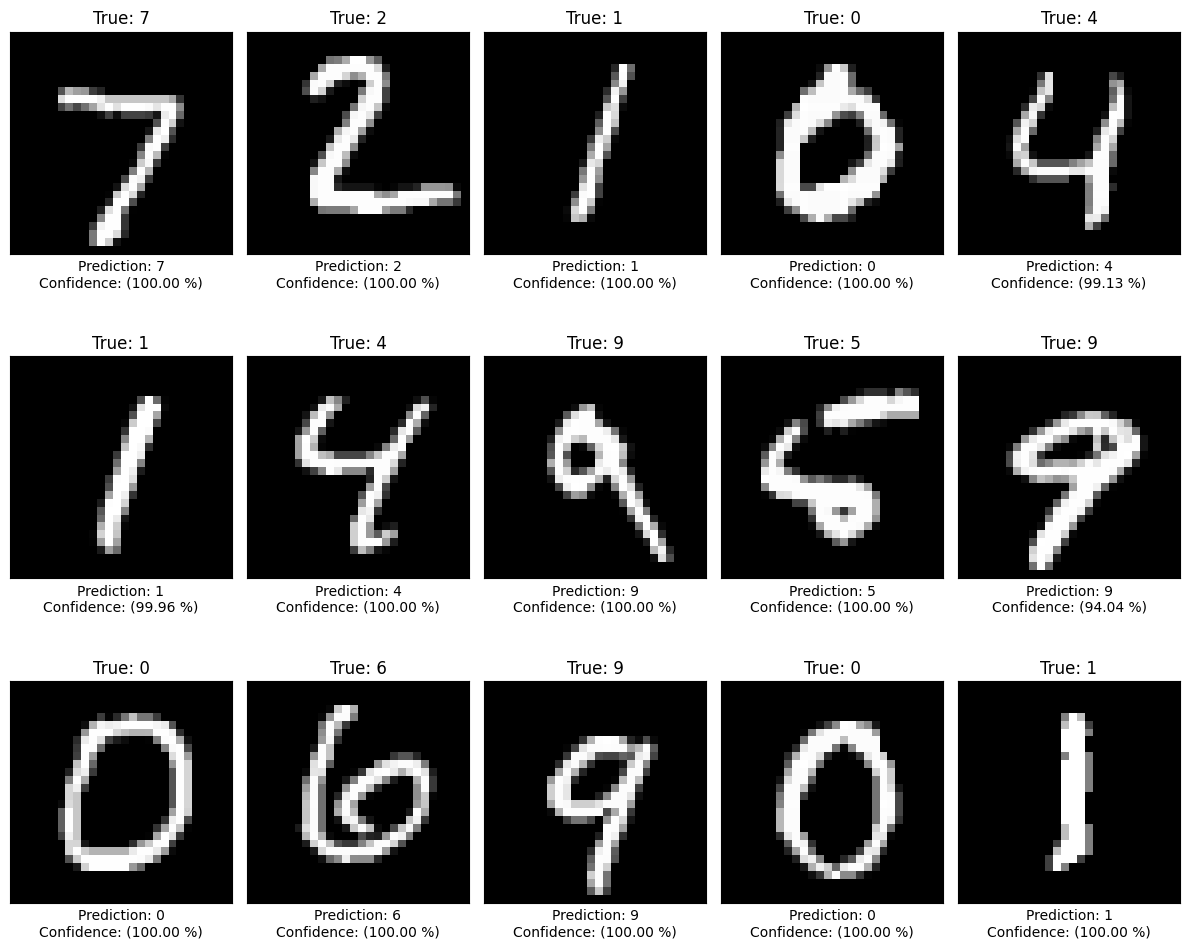

In [47]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])

  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)

  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()